In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [116]:
data = pd.read_csv('CHN.csv')
pd.set_option('display.max_columns', None)
data

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,4,9237-HQITU,Female,0.0,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11229,11229,1905-OEILC,Female,-0.009879354549216905,No,No,1.0079946006237008,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.502302781713354,19.5,No
11230,11230,4229-CZMLL,Male,0.009966377061848697,No,No,NaN,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.89083241253785,469.8,Yes
11231,11231,6969-MVBAI,Female,0.9913752572613183,No,No,NaN,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,NaN,816.8,No
11232,11232,4919-MOAVT,Male,0.0018739479537013093,No,Yes,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,69.64814772905343,220.1,Yes


In [117]:
data = data.drop(columns=['Unnamed: 0', 'customerID'])

In [118]:
data_info = pd.DataFrame(data.dtypes, columns=['Tipe'])
data_info['Unik'] = data.nunique()
data_info['null'] = data.isnull().sum()
data_info

,Tipe,Unik,null
gender,object,2,0
SeniorCitizen,object,3342,1726
Partner,object,3,0
Dependents,object,4,0
tenure,object,3436,1708
PhoneService,object,4,0
MultipleLines,object,5,0
InternetService,object,3,0
OnlineSecurity,object,5,0
OnlineBackup,object,4,0


In [119]:
data.shape

(11234, 20)

In [120]:
unique_values = {col: data[col].unique() for col in data.columns}
for col, values in unique_values.items():
    print(f"{col}: {values}")

gender: ['Female' 'Male']
SeniorCitizen: ['0.0' nan '1.0' ... '0.009966377061848697' '0.9913752572613183'
 '0.0018739479537013093']
Partner: ['Yes' 'No' 'yEs']
Dependents: ['No' 'Yes' 'yeS' 'no']
tenure: ['1.0' '34.0' '2.0' ... '31.001416683295137' '1.0079946006237008'
 '19.992739604191748']
PhoneService: ['No' 'Yes' 'yEs' 'no']
MultipleLines: ['No phone service' 'No' 'Yes' 'no' 'yeS']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service' 'yeS' 'no']
OnlineBackup: ['Yes' 'No' 'No internet service' 'yeS']
DeviceProtection: ['No' 'Yes' 'No internet service' 'yeS' 'no']
TechSupport: ['No' 'Yes' 'no' 'No internet service' 'yEs']
StreamingTV: ['No' 'Yes' 'No internet service' 'nO' 'yEs']
StreamingMovies: ['No' 'Yes' 'No internet service' 'yeS' 'no']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No' 'yEs']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyChar

In [121]:
data["PaymentMethod"] = data["PaymentMethod"].str.replace(" (automatic)", "", regex=False)

In [122]:
data['tenure'] = pd.to_numeric(data['tenure'], errors='coerce').fillna(0).astype(int)
data.drop(data[data['tenure'] == 0].index, inplace=True)

In [123]:
data['MonthlyCharges'] = pd.to_numeric(data['MonthlyCharges'], errors='coerce')
data['MonthlyCharges'] = data['MonthlyCharges'].fillna(data['MonthlyCharges'].mean())

In [124]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data[np.isnan(data['TotalCharges'])]
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [125]:
num_out = ['tenure', 'MonthlyCharges', 'TotalCharges']

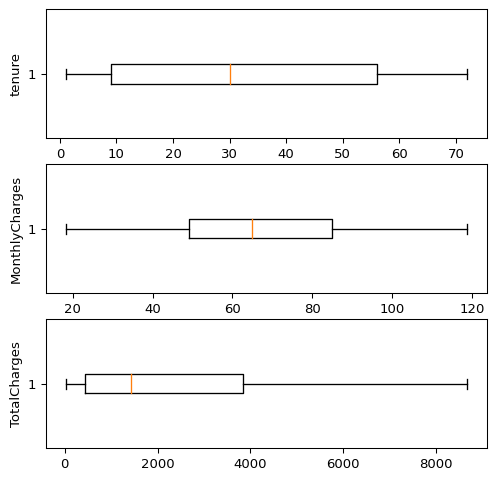

In [126]:
fig, axs = plt.subplots(len(num_out), 1, dpi=95, figsize=(6, 6))
i = 0
for col in num_out:
    axs[i].boxplot(data[col], vert=False)
    axs[i].set_ylabel(col)
    i += 1
plt.show()

In [127]:
data = data[(data['SeniorCitizen'] == '0.0') | (data['SeniorCitizen'] == '1.0')]

In [128]:
data['SeniorCitizen'] = pd.to_numeric(data['SeniorCitizen'], errors='coerce').astype(float)

In [129]:
Numerical_col=[]
Categorical_col=[]
for feature in data.columns:
    if data[feature].dtype!="object":
        Numerical_col.append(feature)
    else:
        Categorical_col.append(feature)

print(Categorical_col)
print(Numerical_col)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [130]:
data["SeniorCitizen"]= data["SeniorCitizen"].map({0: "No", 1: "Yes"}).astype(object)
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950000,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850000,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.300000,1840.75,No
5,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650000,820.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7032,Male,Yes,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.750000,75.75,Yes
7033,Male,No,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card,69.500000,2625.25,No
7037,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer,64.934346,1419.40,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.60,Yes


In [131]:
def kategori_P(x):
    if isinstance(x, str):
        if 'yes' in x.lower():
            return 'yes'
        else:
            return 'no'
    else:
        return 'no'

In [132]:
data.loc[:, 'Partner'] = data['Partner'].apply(kategori_P)
data.loc[:, 'SeniorCitizen'] = data['SeniorCitizen'].apply(kategori_P)
data.loc[:, 'Dependents'] = data['Dependents'].apply(kategori_P)
data.loc[:, 'PhoneService'] = data['PhoneService'].apply(kategori_P)
data.loc[:, 'MultipleLines'] = data['MultipleLines'].apply(kategori_P)
data.loc[:, 'OnlineSecurity'] = data['OnlineSecurity'].apply(kategori_P)
data.loc[:, 'OnlineBackup'] = data['OnlineBackup'].apply(kategori_P)
data.loc[:, 'DeviceProtection'] = data['DeviceProtection'].apply(kategori_P)
data.loc[:, 'TechSupport'] = data['TechSupport'].apply(kategori_P)
data.loc[:, 'StreamingTV'] = data['StreamingTV'].apply(kategori_P)
data.loc[:, 'StreamingMovies'] = data['StreamingMovies'].apply(kategori_P)
data.loc[:, 'PaperlessBilling'] = data['PaperlessBilling'].apply(kategori_P)
data.loc[:, 'Churn'] = data['Churn'].apply(kategori_P)

In [133]:
Numerical_col=[]
Categorical_col=[]
for feature in data.columns:
    if data[feature].dtype!="object":
        Numerical_col.append(feature)
    else:
        Categorical_col.append(feature)

print(Categorical_col)
print(Numerical_col)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
['tenure', 'MonthlyCharges', 'TotalCharges']


In [134]:
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'yes' else (0 if x == 'no' else x))

In [135]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in Categorical_col:
    data.loc[:, col] = label_encoder.fit_transform(data[col])

In [136]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
5,0,0,0,0,8,1,1,1,0,0,1,0,1,1,0,1,2,99.65,820.50,1


In [137]:
churn_distribution = data['Churn'].value_counts(normalize=True)
print(churn_distribution)

Churn
0    0.730138
1    0.269862
Name: proportion, dtype: float64


In [138]:
data = data.drop_duplicates()

In [139]:
data.duplicated().sum()

0

In [140]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [141]:
from imblearn.over_sampling import SMOTE

X = data.drop('Churn', axis=1)
y = data['Churn']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

data = pd.concat([X_resampled, y_resampled], axis=1)

In [142]:
churn_distribution = data['Churn'].value_counts(normalize=True)
print(churn_distribution)

Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


In [143]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.850000,29.850000,0
1,1.0,0.0,0.0,0.0,34,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,56.950000,1889.500000,0
2,1.0,0.0,0.0,0.0,2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.850000,108.150000,1
3,1.0,0.0,0.0,0.0,45,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,42.300000,1840.750000,0
4,0.0,0.0,0.0,0.0,8,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,99.650000,820.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1.0,0.889937,1.0,0.0,53,1.0,0.889937,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.110063,1.0,2.0,101.074525,5556.097351,1
6570,1.0,0.0,0.0,0.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,69.627514,69.627514,1
6571,0.0,1.0,0.631644,0.0,20,1.0,1.0,1.0,0.0,0.0,0.631644,0.0,1.0,0.368356,0.0,0.368356,2.0,92.070830,1959.380110,1
6572,0.945609,0.054391,0.945609,0.945609,1,0.0,0.0,0.0,0.0,0.945609,0.0,0.0,0.0,0.0,0.0,0.054391,2.054391,29.960681,29.960681,1


In [144]:
data.to_csv('CHN_Clean.csv', index=False)

In [145]:
#  from sklearn.preprocessing import LabelEncoder
#
#  def object_to_int(data):
#      if data.dtype=='object':
#        data = LabelEncoder().fit_transform(data)
#      return data
#
#  data = data.apply(object_to_int)

In [146]:
#    from sklearn.preprocessing import OneHotEncoder

#    encoder = OneHotEncoder(sparse=False) 
#    encoded_data = encoder.fit_transform(data[Categorical_col])

#    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(Categorical_col))

#    data.drop(columns=Categorical_col, inplace=True)

#    data.reset_index(drop=True, inplace=True)

#    data = pd.concat([data, encoded_df], axis=1)

In [147]:
#data = data.apply(object_to_int)